# Implementando Regressão Linear do Zero
### Atividade da disciplina de Aprendizagem de Máquina

###### Importando a biblioteca Numpy

In [59]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

###### Autocomplete

In [60]:
%config IPCompleter.greedy=True

In [61]:
def computer_error_for_given_points(b, m, points):
    totalError = 0
    for i in range (0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) **2
    return totalError / float(len(points))

In [62]:
def step_gradient(b_current, m_current, points, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return [new_b, new_m]

###### Definindo o Gradiente

In [63]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

###### Função para pegar o conjunto de dados e analisar. Será chamada dentro da função principal main

In [64]:
def run():
    points = genfromtxt('income.csv', delimiter=',')
    #taxa de aprendizagem
    learning_rate = 0.0001
    #y = mx = b fórmula de inclinação
    initial_b = 0
    initial_m = 0
    #quantidade de iterações
    num_iterations = 1000
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    regression_linear(points, yfit, yresid, SQresid, SQtotal, r)
    print(b)
    print(m)
    

###### main

[  5.59948287 -39.44625668]
0.930962426491


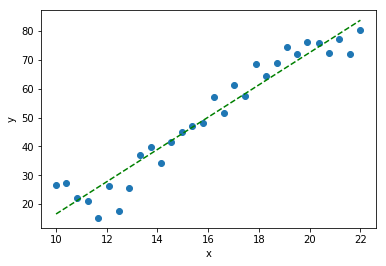

TypeError: regression_linear() takes 0 positional arguments but 6 were given

In [65]:
if __name__ == '__main__':
    x = np.array([10, 10.4013377926421, 10.8428093645485, 11.2441471571906, 11.6454849498328, 12.0869565217391, 12.4882943143813, 12.8896321070234, 13.2909698996656, 13.7324414715719, 14.133779264214, 14.5351170568562, 14.9765886287625, 15.3779264214047, 15.7792642140468, 16.2207357859532, 16.622073578595302, 17.0234113712375, 17.4648829431438, 17.866220735786, 18.2675585284281, 18.7090301003344, 19.1103678929766, 19.5117056856187, 19.9130434782609, 20.3545150501672, 20.7558528428094, 21.1571906354515, 21.5986622073579, 22])
    y = np.array([26.6588387834389, 27.3064353457772, 22.1324101716143, 21.1698405046065, 15.1926335164307, 26.3989510407284, 17.435306578572, 25.5078852305278, 36.884594694235, 39.666108747637, 34.3962805641312, 41.4979935356871, 44.9815748660704, 47.039595257834, 48.2525782901863, 57.0342513373801, 51.4909192102538, 61.3366205527288, 57.581988179306, 68.5537140185881, 64.310925303692, 68.9590086393083, 74.6146392793647, 71.8671953042483, 76.098135379724, 75.77521802986, 72.4860553152424, 77.3550205741877, 72.1187904524136, 80.2605705009016])
    p1 = np.polyfit(x, y, 1)
    yfit = p1[0] * x + p1[1]
    yresid = y - yfit
    SQresid = sum(pow(yresid, 2))
    SQtotal = len(y) * np.var(y)
    r = (1 - SQresid/SQtotal)
    print(p1)
    print(r)
    plt.plot(x, y, 'o')
    plt.plot(x, np.polyval(p1, x), 'g--')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()
    run()